In [1]:
import numpy as np
import pandas as pd

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0.
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式： 1000 * （房屋所在镇非美籍人口所在比例 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [2]:
data = pd.read_csv(r"boston.csv")
# data
# 查看数据的基本信息.同时，也可以用来查看，各个特征列是否存在缺失值。
data.info()
# 查看是否具有重复值。
# data.duplicated().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [3]:
class LinearRegression:
    """使用Python实现的线性回归。（最小二乘法）"""
    
    def fit(self, X, y):
        """根据提供的训练数据X，对模型进行训练。
        
        Parameters
        -----
        X : 类数组类型。形状： [样本数量， 特征数量]
            特征矩阵，用来对模型进行训练。
            
        y : 类数组类型，形状： [样本数量]
        
        """
        # 说明：如果X是数组对象的一部分，而不是完整的对象数据（例如，X是由其他对象通过切片传递过来），
        # 则无法完成矩阵的转换。
        # 这里创建X的拷贝对象，避免转换矩阵的时候失败。
        X = np.asmatrix(X.copy())
        # y是一维结构（行向量或列向量），一维结构可以不用进行拷贝。
        # 注意：我们现在要进行矩阵的运算，因此需要是二维的结构，我们通过reshape方法进行转换。
        y = np.asmatrix(y).reshape(-1, 1)
        # 通过最小二乘公式，求解出最佳的权重值。
        self.w_ = (X.T * X).I * X.T * y
        
    def predict(self, X):
        """根据参数传递的样本X，对样本数据进行预测。
        
        Parameters
        -----
        X : 类数组类型。形状： [样本数量， 特征数量]
            待预测的样本特征（属性）。
            
        Returns
        -----
        result : 数组类型
            预测的结果。
        
        """
        # 将X转换成矩阵，注意，需要对X进行拷贝。
        X = np.asmatrix(X.copy())
        result = X * self.w_
        print(result)
        # 将矩阵转换成ndarray数组，进行扁平化处理，然后返回结果。
        # 使用ravel可以将数组进行扁平化处理。
        return np.array(result).ravel()

In [4]:
# 不考虑截距的情况
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
# 查看模型的权重值
display(lr.w_)

[[32.42261152]
 [31.86156126]
 [ 9.51330759]
 [12.48133747]
 [24.07611064]
 [35.60814742]
 [21.87646779]
 [21.84153557]
 [16.09224261]
 [28.4890082 ]
 [41.27931758]
 [26.01023288]
 [40.9023699 ]
 [24.65369946]
 [22.23194989]
 [11.89275584]
 [14.53199976]
 [13.11832629]
 [21.07208434]
 [ 1.63473753]
 [26.2692255 ]
 [25.86938312]
 [40.15456584]
 [19.12623535]
 [24.3262408 ]
 [35.13250993]
 [32.2589841 ]
 [ 8.89386625]
 [25.58850701]
 [43.81180397]
 [19.52765456]
 [20.54277923]
 [24.57246882]
 [18.66045343]
 [ 6.18777975]
 [20.39954995]
 [37.07675784]
 [17.10215026]
 [22.57044594]
 [14.31218642]
 [22.99379236]
 [21.06321632]
 [20.67443731]
 [21.46832527]
 [33.63767218]
 [22.37780827]
 [29.65090997]
 [34.74770006]
 [42.06223051]
 [17.38187885]
 [16.53307771]
 [36.47833571]
 [19.91068267]
 [10.55759635]
 [16.48359441]
 [23.49107944]
 [21.51026115]
 [18.98645669]
 [26.06769854]
 [11.42724381]
 [ 7.66610465]
 [21.89186167]
 [ 8.08036631]
 [25.81339215]
 [ 3.39812313]
 [27.0866603 ]
 [32.58455

17.01267969846728

matrix([[-9.18342810e-02],
        [ 4.39241264e-02],
        [ 6.03666834e-03],
        [ 2.41855561e+00],
        [-3.33200936e+00],
        [ 5.58715607e+00],
        [-2.15854534e-03],
        [-8.56861175e-01],
        [ 2.27259981e-01],
        [-1.18811255e-02],
        [-2.52949647e-01],
        [ 1.50099506e-02],
        [-4.56877090e-01]])

In [5]:
t

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,20.6
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29,18.7
310,2.63548,0.0,9.90,0.0,0.544,4.973,37.8,2.5194,4.0,304.0,18.4,350.45,12.64,16.1
102,0.22876,0.0,8.56,0.0,0.520,6.405,85.4,2.7147,5.0,384.0,20.9,70.80,10.63,18.6


In [6]:
# 考虑截距，增加一列，该列的所有值都是1。
t = data.sample(len(data), random_state=0)
# 可以这样增加一列。
# t["Intercept"] = 1
# 按照习惯，截距作为w0，我们为之而配上一个x0，x0列放在最前面。
new_columns = t.columns.insert(0, "Intercept")
# 重新安排列的顺序，如果值为空，则使用fill_value参数指定的值进行填充。
t = t.reindex(columns=new_columns, fill_value=1)
# t["Intercept"] = 1
# t
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

lr = LinearRegression()
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# result
display(np.mean((result - test_y) ** 2))
display(lr.w_)

[[35.34647338]
 [32.55720266]
 [ 8.40630514]
 [10.76060958]
 [22.40297205]
 [34.57337683]
 [18.84414799]
 [19.05167211]
 [15.26567321]
 [26.19586657]
 [39.69151418]
 [25.57492829]
 [41.1927093 ]
 [25.15029906]
 [22.62643044]
 [10.66102304]
 [12.54928069]
 [14.90709068]
 [18.91134767]
 [ 3.65090209]
 [27.59736901]
 [26.43467447]
 [39.51788269]
 [20.6344755 ]
 [21.66628414]
 [34.30541184]
 [33.10635959]
 [10.11723643]
 [25.39010326]
 [41.80770368]
 [17.22263143]
 [18.49689376]
 [25.64747971]
 [18.75291341]
 [ 6.55078142]
 [20.42634518]
 [34.56041209]
 [16.53924922]
 [23.30148353]
 [14.4497758 ]
 [24.49513488]
 [19.60529666]
 [17.76989718]
 [18.36261218]
 [33.50023364]
 [19.90181694]
 [31.64084077]
 [34.19152519]
 [39.78055211]
 [17.58064129]
 [17.41894961]
 [35.9080134 ]
 [18.64925747]
 [ 8.83670164]
 [14.8995962 ]
 [25.1838175 ]
 [20.46579876]
 [17.08707916]
 [27.58383071]
 [13.38668501]
 [ 6.29561152]
 [19.77963926]
 [ 7.26301219]
 [27.08986683]
 [ 2.26193311]
 [29.44926487]
 [32.02811

17.101003508571427

matrix([[ 4.00945995e+01],
        [-1.09547194e-01],
        [ 4.10831831e-02],
        [ 1.18301009e-02],
        [ 2.03476430e+00],
        [-1.95745194e+01],
        [ 3.28214790e+00],
        [ 6.97061145e-03],
        [-1.39788591e+00],
        [ 3.77818627e-01],
        [-1.54858651e-02],
        [-8.65309243e-01],
        [ 8.40572928e-03],
        [-5.67832943e-01]])

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


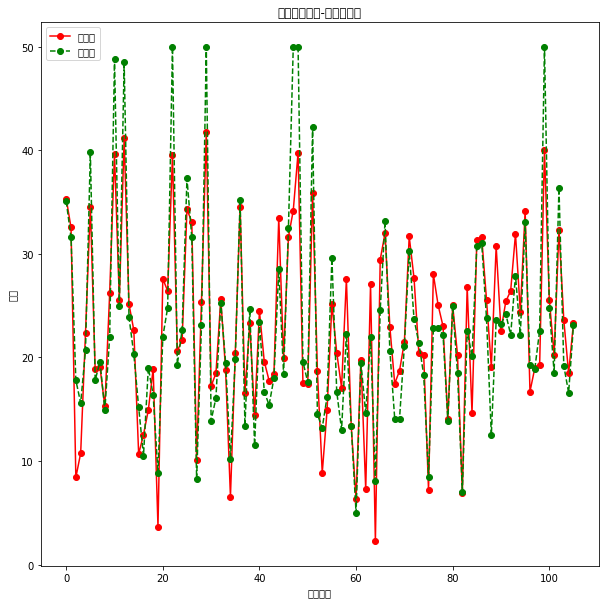

In [8]:
plt.figure(figsize=(10, 10))
# 绘制预测值
plt.plot(result, "ro-", label="预测值")
# 绘制真实值
plt.plot(test_y.values, "go--", label="真实值")
plt.title("线性回归预测-最小二乘法")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()